In [1]:
import pandas as pd

# sentiment

In [2]:
s = open('raw/raw_sentiment_doc.txt').read()

In [3]:
def get_link(s: str) -> str:
    i = s.index('://')
    try:
        j = s[i:].index('\n')
    except ValueError:
        j = s[i:].index(' ')
    s = s[i:i+j]
    s = s.split()[0]
    return s

def has_label(s) -> bool:
    return ('НЕЙТРАЛЬНО' in s) or ('НЕГАТИВНО' in s) or ('ПОЛОЖИТЕЛЬНО' in s)

def get_label(s: str) -> str:
    if 'НЕЙТРАЛЬНО' in s:
        return 0
    elif 'НЕГАТИВНО' in s:
        return -1
    elif 'ПОЛОЖИТЕЛЬНО':
        return 1
    else:
        raise ValueError

In [4]:
items = s.split('https')
items = list(filter(lambda i: has_label(i), items))
# print('\n|\n'.join(items))

In [5]:
records = []

for i, item in enumerate(items):
    try:
        link = get_link(item)
    except Exception as e:
        print(item)
        raise e
        
    # if i > 31 and i < 35:
    #     print(link, get_label(item))
    records.append(('https' + link, get_label(item)))
    
df = pd.DataFrame.from_records(records, columns=['link', 'sentiment'])
print(len(df))
# df.to_csv('tmp.csv')

108


In [6]:
articles = pd.read_csv('./raw/articles/articles.csv')
articles.head(3)

,title,text,create_dttm,link,site
0,Инвалидам перекрыли входы в кафе и магазины Кр...,\n Магазины и кафе Кронштадта оказались недост...,2018-01-23 13:16:00,https://moika78.ru/news/2018-01-23/12164-inval...,moika78
1,Петербургские инвалиды не хотят хвалить метроп...,Оказывать помощь некоторым группам инвалидам н...,2018-01-30 15:53:00,https://moika78.ru/news/2018-01-30/13170-peter...,moika78
2,Петербургских родителей детей-инвалидов поддер...,\n Горячая линия для родителей детей с инвали...,2018-01-31 13:12:00,https://moika78.ru/news/2018-01-31/13312-peter...,moika78


array([[<Axes: title={'center': 'sentiment'}>]], dtype=object)

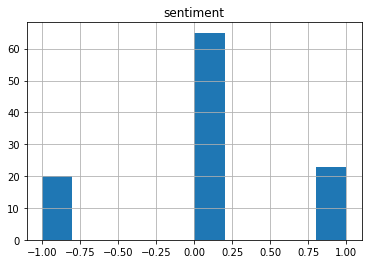

In [7]:
df = pd.merge(articles, df, how='left', on='link')#.label
df.hist()

In [8]:
df.head()

,title,text,create_dttm,link,site,sentiment
0,Инвалидам перекрыли входы в кафе и магазины Кр...,\n Магазины и кафе Кронштадта оказались недост...,2018-01-23 13:16:00,https://moika78.ru/news/2018-01-23/12164-inval...,moika78,0.0
1,Петербургские инвалиды не хотят хвалить метроп...,Оказывать помощь некоторым группам инвалидам н...,2018-01-30 15:53:00,https://moika78.ru/news/2018-01-30/13170-peter...,moika78,NaN
2,Петербургских родителей детей-инвалидов поддер...,\n Горячая линия для родителей детей с инвали...,2018-01-31 13:12:00,https://moika78.ru/news/2018-01-31/13312-peter...,moika78,NaN
3,В Петербурге оштрафовали «Мираж Синема» за отк...,Роспотребнадзор по Санкт-Петербургу оштрафовал...,2018-02-14 13:38:00,https://moika78.ru/news/2018-02-14/14985-v-pet...,moika78,NaN
4,Люди каменного века относились к инвалидам с у...,Первобытные люди жившие на территории современ...,2018-02-16 20:24:00,https://moika78.ru/news/2018-02-16/15298-lyudi...,moika78,NaN


# ethics

In [9]:
s = open('raw/raw_ethics_doc.txt').read()

In [10]:
def get_link(s: str) -> str:
    i = s.index('https')
    j = s[i:].index(' ')
    s = s[i:i+j]
    s = s.split()[0]
    if '?' in s:
        # drop link params
        s = s[:s.index('?')]
    return s

def get_label(s: str) -> str:
    if 'НЕЭТИЧНО' in s:
        return 0
    elif ' ЭТИЧНО' in s:
        return 1
    else:
        raise ValueError

In [11]:
records = []

for line in s.splitlines():
    if 'https' not in line:
        continue
    
    # print(line)
    link = get_link(line.strip())
    label = get_label(line)
    records.append((link, label))

df2 = pd.DataFrame.from_records(records, columns=['link', 'ethics'])
df2 = df2[~df2.link.apply(lambda l: 'vk.com' in l)]
df2.shape

(95, 2)

In [12]:
s1 = set(df2.link.tolist())
s2 = set(df.link.tolist())

s1.difference(s2)

{'https://moika78.ru/news/2019-04-19/219847-izbivshij-invalida-v-kronshtadte-stal-figurantom-ugolovnogo-dela/',
 'https://moika78.ru/news/2019-08-24/277847-razrabotan-umnyj-braslet-predskazyvayushhij-vspyshki-agressii-pri-autizme/',
 'https://moika78.ru/news/2020-04-11/397194-prozhivayushhie-v-nyu-jorke-veterany-poluchili-medali-k-75-letiyu-pobedy/',
 'https://spbdnevnik.ru/news/2019-08-19/v-novoy-gollandii-proydet-festival-anton-tut-ryadom',
 'https://spbdnevnik.ru/news/2019-10-13/invalid-iz-veselogo-poselka-izgotovil-sebe-skorostnuyu-kolyasku-iz-giroskutera-i-detskogo-velosipeda',
 'https://spbdnevnik.ru/news/2019-12-10/zhenschina-otkazalas-ot-svoego-rebenka-s-sindromom-dauna-i-vstretilas-s-nim-cherez-9-let',
 'https://spbdnevnik.ru/news/2019-12-26/ya-budu-esche-luchshe-uchitsya-i-reshu-svoi-problemy-kak-paren-s-autizmom-postupil-v-konservatoriyu',
 'https://spbdnevnik.ru/news/2020-08-25/organy-opeki-naydut-vremennyy-dom-dlya-otravlennogo-alkogolem-malchika-i-ego-sestry',
 'https://s

array([[<Axes: title={'center': 'sentiment'}>,
        <Axes: title={'center': 'ethics'}>]], dtype=object)

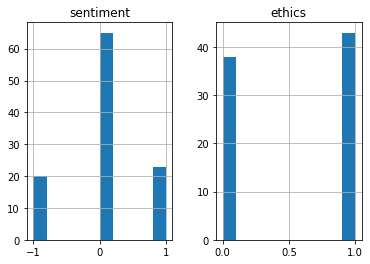

In [13]:
df = pd.merge(df, df2, how='left', on='link')#.hist()
df.hist()

# save

In [14]:
df.to_csv('./raw/articles/articles.csv', index=False)